In [74]:
import os
import pandas as pd
from glob import glob
import paramiko
from getpass import getpass
import traceback
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
os.chdir("/home/stotoshka/Documents/ANGEL_dev")

# Подготовка выборок для обучения

In [7]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
for w in 2 3 4
do
	echo "Window radius = "$w
	python Proteasome/in_vitro/prepareTrain.py -t C -w $w
done

Window radius = 2
Num substrate = 88
Fold 0:
Train 71
0    1345
1    1066
Name: activity, dtype: int64
Test 17
0    1345
1    1066
Name: activity, dtype: int64
Fold 1:
Train 71
0    1163
1     995
Name: activity, dtype: int64
Test 17
0    1163
1     995
Name: activity, dtype: int64
Fold 2:
Train 70
0    1579
1    1183
Name: activity, dtype: int64
Test 18
0    1579
1    1183
Name: activity, dtype: int64
Fold 3:
Train 70
0    1463
1    1143
Name: activity, dtype: int64
Test 18
0    1463
1    1143
Name: activity, dtype: int64
Fold 4:
Train 70
0    1430
1    1149
Name: activity, dtype: int64
Test 18
0    1430
1    1149
Name: activity, dtype: int64
Window radius = 3
Num substrate = 88
Fold 0:
Train 71
0    1269
1    1000
Name: activity, dtype: int64
Test 17
0    1269
1    1000
Name: activity, dtype: int64
Fold 1:
Train 71
0    1080
1     936
Name: activity, dtype: int64
Test 17
0    1080
1     936
Name: activity, dtype: int64
Fold 2:
Train 70
0    1497
1    1125
Name: activity, dtype: int64

In [61]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
for w in 2 3 4
do
	echo "Window radius = "$w
	python Proteasome/in_vitro/prepareValidation.py -t C -w $w
done

Window radius = 2


/home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/prepareValidation.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  calis_data_filtered["sequence"] = calis_data_filtered["cleavage_sites"].str.replace("\\|","")
/home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/prepareValidation.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calis_data_filtered["sequence"] = calis_data_filtered["cleavage_sites"].str.replace("\\|","")


0    1745
1    1384
Name: activity, dtype: int64
Num substrate = 214
0    1683
1     604
Name: activity, dtype: int64
Window radius = 3


/home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/prepareValidation.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  calis_data_filtered["sequence"] = calis_data_filtered["cleavage_sites"].str.replace("\\|","")
/home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/prepareValidation.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calis_data_filtered["sequence"] = calis_data_filtered["cleavage_sites"].str.replace("\\|","")


0    1646
1    1307
Name: activity, dtype: int64
Num substrate = 214
0    1403
1     456
Name: activity, dtype: int64
Window radius = 4


/home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/prepareValidation.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  calis_data_filtered["sequence"] = calis_data_filtered["cleavage_sites"].str.replace("\\|","")
/home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/prepareValidation.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calis_data_filtered["sequence"] = calis_data_filtered["cleavage_sites"].str.replace("\\|","")


0    1549
1    1228
Name: activity, dtype: int64
Num substrate = 214
0    1129
1     302
Name: activity, dtype: int64


# Конвертация в SDF

In [21]:
to_convert_files = glob("Proteasome/in_vitro/const/train/*_ready_*.csv")
print(to_convert_files)

['Proteasome/in_vitro/const/train/train_ready_const_4_2.csv', 'Proteasome/in_vitro/const/train/test_ready_const_3_2.csv', 'Proteasome/in_vitro/const/train/train_ready_const_3_1.csv', 'Proteasome/in_vitro/const/train/test_ready_const_2_3.csv', 'Proteasome/in_vitro/const/train/test_ready_const_2_4.csv', 'Proteasome/in_vitro/const/train/train_ready_const_4_3.csv', 'Proteasome/in_vitro/const/train/train_ready_const_3_2.csv', 'Proteasome/in_vitro/const/train/test_ready_const_3_1.csv', 'Proteasome/in_vitro/const/train/test_ready_const_3_4.csv', 'Proteasome/in_vitro/const/train/train_ready_const_3_4.csv', 'Proteasome/in_vitro/const/train/train_ready_const_4_4.csv', 'Proteasome/in_vitro/const/train/test_ready_const_3_3.csv', 'Proteasome/in_vitro/const/train/train_ready_const_4_1.csv', 'Proteasome/in_vitro/const/train/test_ready_const_2_2.csv', 'Proteasome/in_vitro/const/train/train_ready_const_2_1.csv', 'Proteasome/in_vitro/const/train/train_ready_const_2_0.csv', 'Proteasome/in_vitro/const/tra

In [25]:
%%time
for file in to_convert_files:
	print(file)
	path_to_config = "Proteasome/in_vitro/const/converter_config.json"
	command = f"python tools/generateConfigForConverter.py -i {os.path.join(os.getcwd(),file)} -o {os.path.join(os.getcwd(),'Proteasome/in_vitro/const/sdf')} -c peptide -t 10 {path_to_config}"
	os.system(command)
	print("Convertation")
	convert_command = f"python tools/SeqToSDF.py {path_to_config}"
	os.system(convert_command)

Proteasome/in_vitro/const/train/train_ready_const_4_2.csv
Success
Convertation
Success
--- 1.8228752613067627 seconds ---
Proteasome/in_vitro/const/train/test_ready_const_3_2.csv
Success
Convertation
Success
--- 0.9639692306518555 seconds ---
Proteasome/in_vitro/const/train/train_ready_const_3_1.csv
Success
Convertation
Success
--- 0.98089599609375 seconds ---
Proteasome/in_vitro/const/train/test_ready_const_2_3.csv
Success
Convertation
Success
--- 0.37511706352233887 seconds ---
Proteasome/in_vitro/const/train/test_ready_const_2_4.csv
Success
Convertation
Success
--- 0.36496686935424805 seconds ---
Proteasome/in_vitro/const/train/train_ready_const_4_3.csv
Success
Convertation
Success
--- 1.7000763416290283 seconds ---
Proteasome/in_vitro/const/train/train_ready_const_3_2.csv
Success
Convertation
Success
--- 0.9947574138641357 seconds ---
Proteasome/in_vitro/const/train/test_ready_const_3_1.csv
Success
Convertation
Success
--- 0.7623775005340576 seconds ---
Proteasome/in_vitro/const/tr

In [26]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
rm Proteasome/in_vitro/const/sdf/*.txt
cp Proteasome/in_vitro/const/sdf/* /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf

# Генерация заданий для обучения и валидации

In [27]:
train_files = glob("/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/train*.sdf")
print(train_files)

['/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/train_ready_const_2_0.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/train_ready_const_2_1.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/train_ready_const_2_2.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/train_ready_const_2_3.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/train_ready_const_2_4.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/train_ready_const_3_0.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/train_ready_const_3_1.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/train_ready_const_3_2.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/train_ready_const_3_3.sdf', '/run/user/1000/gvfs/smb-sh

In [37]:
for file in train_files:
	for level in range(2,13):
		name = os.path.splitext(os.path.basename(file))[0]
		print(f"{name}_{level}")
		command = f"python tools/generateConfigForTrain.py -l {level} -b {name}_{level} -s sdf/{os.path.basename(file)} -a activity -p models/{name}_{level} /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/{name}_{level}_tr.txt"
		os.system(command)

train_ready_const_2_0_2
Success
train_ready_const_2_0_3
Success
train_ready_const_2_0_4
Success
train_ready_const_2_0_5
Success
train_ready_const_2_0_6
Success
train_ready_const_2_0_7
Success
train_ready_const_2_0_8
Success
train_ready_const_2_0_9
Success
train_ready_const_2_0_10
Success
train_ready_const_2_0_11
Success
train_ready_const_2_0_12
Success
train_ready_const_2_1_2
Success
train_ready_const_2_1_3
Success
train_ready_const_2_1_4
Success
train_ready_const_2_1_5
Success
train_ready_const_2_1_6
Success
train_ready_const_2_1_7
Success
train_ready_const_2_1_8
Success
train_ready_const_2_1_9
Success
train_ready_const_2_1_10
Success
train_ready_const_2_1_11
Success
train_ready_const_2_1_12
Success
train_ready_const_2_2_2
Success
train_ready_const_2_2_3
Success
train_ready_const_2_2_4
Success
train_ready_const_2_2_5
Success
train_ready_const_2_2_6
Success
train_ready_const_2_2_7
Success
train_ready_const_2_2_8
Success
train_ready_const_2_2_9
Success
train_ready_const_2_2_10
Success
t

In [38]:
test_files = glob("/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/test*.sdf")
print(test_files)

['/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/test_ready_const_2_0.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/test_ready_const_2_1.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/test_ready_const_2_2.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/test_ready_const_2_3.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/test_ready_const_2_4.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/test_ready_const_3_0.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/test_ready_const_3_1.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/test_ready_const_3_2.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/sdf/test_ready_const_3_3.sdf', '/run/user/1000/gvfs/smb-share:serve

In [39]:
for file in test_files:
	for level in range(2,13):
		name = os.path.splitext(os.path.basename(file))[0]
		print(f"{name}_{level}")
		command = f"python tools/generateConfigForPrediction.py -m models/{name.replace('test','train')}_{level}.MSAR -s sdf/{os.path.basename(file)} -a activity -p results /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/{name}_{level}_val.txt"
		os.system(command)

test_ready_const_2_0_2
Success
test_ready_const_2_0_3
Success
test_ready_const_2_0_4
Success
test_ready_const_2_0_5
Success
test_ready_const_2_0_6
Success
test_ready_const_2_0_7
Success
test_ready_const_2_0_8
Success
test_ready_const_2_0_9
Success
test_ready_const_2_0_10
Success
test_ready_const_2_0_11
Success
test_ready_const_2_0_12
Success
test_ready_const_2_1_2
Success
test_ready_const_2_1_3
Success
test_ready_const_2_1_4
Success
test_ready_const_2_1_5
Success
test_ready_const_2_1_6
Success
test_ready_const_2_1_7
Success
test_ready_const_2_1_8
Success
test_ready_const_2_1_9
Success
test_ready_const_2_1_10
Success
test_ready_const_2_1_11
Success
test_ready_const_2_1_12
Success
test_ready_const_2_2_2
Success
test_ready_const_2_2_3
Success
test_ready_const_2_2_4
Success
test_ready_const_2_2_5
Success
test_ready_const_2_2_6
Success
test_ready_const_2_2_7
Success
test_ready_const_2_2_8
Success
test_ready_const_2_2_9
Success
test_ready_const_2_2_10
Success
test_ready_const_2_2_11
Success


# Запуск обучения и валидации

In [41]:
def checkTrain(path):
	flag = False
	header = "No	 Check	 Number	 IAP	 20-Fold	 Activity Type"
	try:
		with open(path,"r",encoding="cp1252") as log:
			for line in log:
				if header in line:
					flag = True
	except:
		traceback.print_exc()
	finally:
		return flag

In [42]:
def checkValidation(path):
	try:
		f=False
		with open(path,"r",encoding="cp1252") as log:
			for line in log:
				if "are predicted" in line:
					comps = line.strip().split(" ")
					if int(comps[0]) == int(comps[2]):
						f = True
					else:
						f = False
	except:
		traceback.print_exc()
	finally:
		return f

In [49]:
tr_tasks =[os.path.basename(p) for p in glob("/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/*_tr.txt")]
tr_tasks.sort(key=len)
print(tr_tasks)

['train_ready_const_2_0_2_tr.txt', 'train_ready_const_2_0_3_tr.txt', 'train_ready_const_2_0_4_tr.txt', 'train_ready_const_2_0_5_tr.txt', 'train_ready_const_2_0_6_tr.txt', 'train_ready_const_2_0_7_tr.txt', 'train_ready_const_2_0_8_tr.txt', 'train_ready_const_2_0_9_tr.txt', 'train_ready_const_2_1_2_tr.txt', 'train_ready_const_2_1_3_tr.txt', 'train_ready_const_2_1_4_tr.txt', 'train_ready_const_2_1_5_tr.txt', 'train_ready_const_2_1_6_tr.txt', 'train_ready_const_2_1_7_tr.txt', 'train_ready_const_2_1_8_tr.txt', 'train_ready_const_2_1_9_tr.txt', 'train_ready_const_2_2_2_tr.txt', 'train_ready_const_2_2_3_tr.txt', 'train_ready_const_2_2_4_tr.txt', 'train_ready_const_2_2_5_tr.txt', 'train_ready_const_2_2_6_tr.txt', 'train_ready_const_2_2_7_tr.txt', 'train_ready_const_2_2_8_tr.txt', 'train_ready_const_2_2_9_tr.txt', 'train_ready_const_2_3_2_tr.txt', 'train_ready_const_2_3_3_tr.txt', 'train_ready_const_2_3_4_tr.txt', 'train_ready_const_2_3_5_tr.txt', 'train_ready_const_2_3_6_tr.txt', 'train_ready_

In [50]:
val_tasks =[os.path.basename(p) for p in glob("/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/*_val.txt")]
val_tasks.sort(key=len)
print(val_tasks)

['test_ready_const_2_0_2_val.txt', 'test_ready_const_2_0_3_val.txt', 'test_ready_const_2_0_4_val.txt', 'test_ready_const_2_0_5_val.txt', 'test_ready_const_2_0_6_val.txt', 'test_ready_const_2_0_7_val.txt', 'test_ready_const_2_0_8_val.txt', 'test_ready_const_2_0_9_val.txt', 'test_ready_const_2_1_2_val.txt', 'test_ready_const_2_1_3_val.txt', 'test_ready_const_2_1_4_val.txt', 'test_ready_const_2_1_5_val.txt', 'test_ready_const_2_1_6_val.txt', 'test_ready_const_2_1_7_val.txt', 'test_ready_const_2_1_8_val.txt', 'test_ready_const_2_1_9_val.txt', 'test_ready_const_2_2_2_val.txt', 'test_ready_const_2_2_3_val.txt', 'test_ready_const_2_2_4_val.txt', 'test_ready_const_2_2_5_val.txt', 'test_ready_const_2_2_6_val.txt', 'test_ready_const_2_2_7_val.txt', 'test_ready_const_2_2_8_val.txt', 'test_ready_const_2_2_9_val.txt', 'test_ready_const_2_3_2_val.txt', 'test_ready_const_2_3_3_val.txt', 'test_ready_const_2_3_4_val.txt', 'test_ready_const_2_3_5_val.txt', 'test_ready_const_2_3_6_val.txt', 'test_ready_c

In [48]:
succeded = []
for tr in tr_tasks:
	if checkTrain(f"/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/models/{tr.replace('_tr.txt','')}.HST"):
		succeded.append(tr)
succeded

Traceback (most recent call last):
  File "/tmp/ipykernel_61516/686754089.py", line 5, in checkTrain
    with open(path,"r",encoding="cp1252") as log:
  File "/home/stotoshka/Soft/anaconda3/envs/research/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 282, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/models/train_ready_const_2_0_10.HST'
Traceback (most recent call last):
  File "/tmp/ipykernel_61516/686754089.py", line 5, in checkTrain
    with open(path,"r",encoding="cp1252") as log:
  File "/home/stotoshka/Soft/anaconda3/envs/research/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 282, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/models/train_ready_const_

[]

In [59]:
%%time
client = paramiko.SSHClient()
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client.connect('192.168.0.10', username='SmirnygaTotoshka', password=getpass())

for tr,val in zip(tr_tasks,val_tasks):
	print(tr)
	if tr in succeded:
		continue
	tr_command = r"C:\Users\SmirnygaTotoshka\Desktop\OLMPASS\OLMPASSdoSAR.exe C:\Users\SmirnygaTotoshka\Desktop\diplom\ANGEL\const\\"+tr
	stdin, stdout, stderr = client.exec_command(tr_command)  # Non-blocking call
	exit_status = stdout.channel.recv_exit_status()          # Blocking call
	if exit_status == 0:
		if checkTrain(f"/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/models/{tr.replace('_tr.txt','')}.HST"):
			print ("Train ended")
			val_command = r"C:\Users\SmirnygaTotoshka\Desktop\OLMPASS\OLMPASS2CSV.exe C:\Users\SmirnygaTotoshka\Desktop\diplom\ANGEL\const\\"+val
			stdin_val, stdout_val, stderr_val = client.exec_command(val_command)  # Non-blocking call
			exit_status_val = stdout_val.channel.recv_exit_status()
			if exit_status == 0:
				test_name = '_'.join(val.split("_")[0:-2]) + "-" + tr.replace("_tr.txt","") + ".HST"
				if checkValidation(f"/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/results/{test_name}"):
					print("Validation ended")
				else:
					print(f"{val} ended with errors")
			else:
				print("Error validation", exit_status_val)
		else:
			print(f"{tr} ended with errors")
	else:
		print("Error", exit_status)
client.close()

train_ready_const_2_0_2_tr.txt
Train ended
test_ready_const_2_0_2_val.txt ended with errors
train_ready_const_2_0_3_tr.txt
Train ended
test_ready_const_2_0_3_val.txt ended with errors
train_ready_const_2_0_4_tr.txt
Train ended
test_ready_const_2_0_4_val.txt ended with errors
train_ready_const_2_0_5_tr.txt
Train ended
test_ready_const_2_0_5_val.txt ended with errors
train_ready_const_2_0_6_tr.txt
Train ended
test_ready_const_2_0_6_val.txt ended with errors
train_ready_const_2_0_7_tr.txt
Train ended
test_ready_const_2_0_7_val.txt ended with errors
train_ready_const_2_0_8_tr.txt
Train ended
test_ready_const_2_0_8_val.txt ended with errors
train_ready_const_2_0_9_tr.txt
Train ended
test_ready_const_2_0_9_val.txt ended with errors
train_ready_const_2_1_2_tr.txt
Train ended
test_ready_const_2_1_2_val.txt ended with errors
train_ready_const_2_1_3_tr.txt
Train ended
test_ready_const_2_1_3_val.txt ended with errors
train_ready_const_2_1_4_tr.txt
Train ended
test_ready_const_2_1_4_val.txt ended 

# Обработка результатов

In [63]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
cp /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/models/*.HST Proteasome/in_vitro/const/results/5CV/internal
cp /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/const/results/*.csv Proteasome/in_vitro/const/results/5CV/external

In [67]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
python Proteasome/parse5CV.py internal console /home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/const/results/5CV/internal /home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/const/results/5CV/internal.xlsx
python Proteasome/parse5CV.py external console /home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/const/results/5CV/external /home/stotoshka/Documents/ANGEL_dev/Proteasome/in_vitro/const/results/5CV/external.xlsx

## Внутренняя валидация

In [68]:
internal_result = pd.read_excel("Proteasome/in_vitro/const/results/5CV/internal.xlsx").query("activity == 1")
internal_result.head()

,model_name,window,fold,descriptor_level,iap,twentyCV,activity,num_subst
0,const,2,1,3,0.6420,0.6425,1,899
3,const,4,1,9,0.7629,0.7601,1,807
5,const,4,2,6,0.7214,0.7214,1,987
6,const,2,2,8,0.6668,0.6621,1,1080
9,const,4,1,7,0.7484,0.7476,1,807


In [78]:
m_2 = internal_result.query("window == 2")
m_3 = internal_result.query("window == 3")
m_4 = internal_result.query("window == 4")

<Axes: xlabel='descriptor_level', ylabel='twentyCV'>

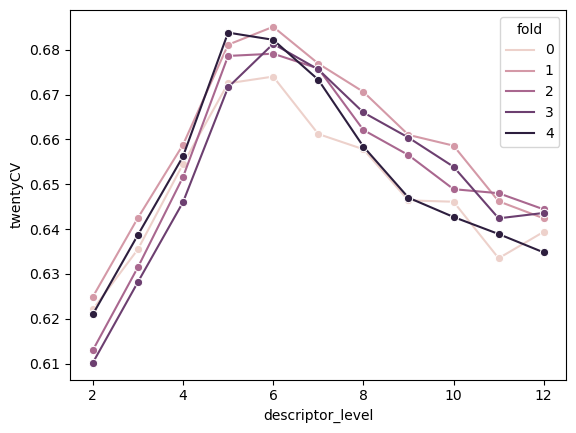

In [79]:
m_2_internal_plot = sns.lineplot(x = 'descriptor_level', y = 'twentyCV', data=m_2, hue='fold', marker="o")
plt.savefig("Proteasome/in_vitro/const/results/5CV/plots/m_2.png")
m_2_internal_plot

<Axes: xlabel='descriptor_level', ylabel='twentyCV'>

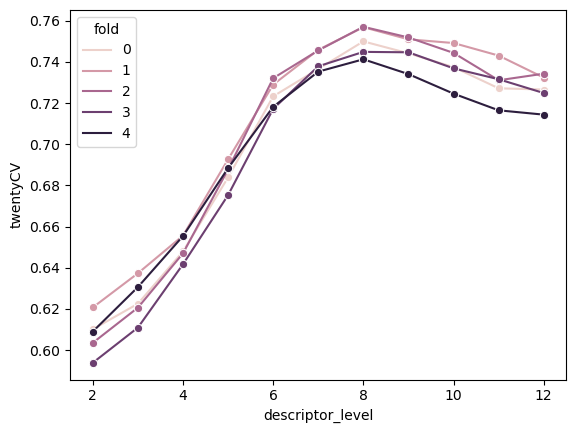

In [80]:
m_3_internal_plot = sns.lineplot(x = 'descriptor_level', y = 'twentyCV', data=m_3, hue='fold', marker="o")
plt.savefig("Proteasome/in_vitro/const/results/5CV/plots/m_3.png")
m_3_internal_plot

<Axes: xlabel='descriptor_level', ylabel='twentyCV'>

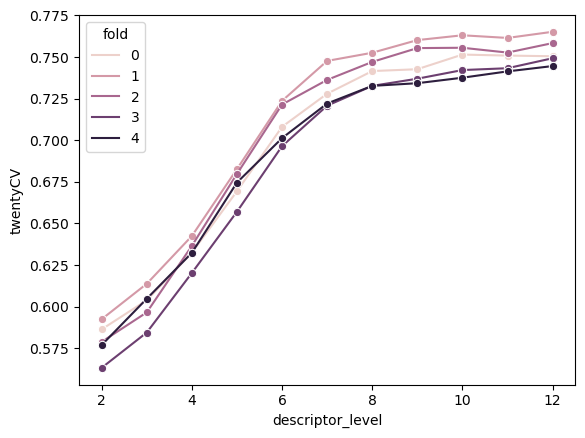

In [81]:
m_4_internal_plot = sns.lineplot(x = 'descriptor_level', y = 'twentyCV', data=m_4, hue='fold', marker="o")
plt.savefig("Proteasome/in_vitro/const/results/5CV/plots/m_4.png")
m_4_internal_plot

## Внешняя валидация

In [83]:
external_result = pd.read_excel("Proteasome/in_vitro/const/results/5CV/external.xlsx")
external_result.head()

,model,level,auc_roc,ap
0,const_2,12,0.983705,0.956212
1,const_2,9,0.983259,0.954198
2,const_3,12,0.987662,0.968582
3,const_2,8,0.982531,0.952797
4,const_2,6,0.937649,0.904778


<Axes: xlabel='level', ylabel='auc_roc'>

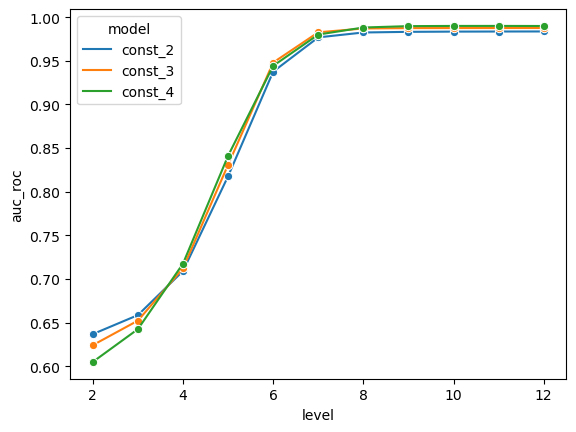

In [84]:
auc_plot = sns.lineplot(x='level', y='auc_roc', data=external_result, hue='model', marker="o")
plt.savefig("Proteasome/in_vitro/const/results/5CV/plots/auc_for_levels.png")
auc_plot

<Axes: xlabel='level', ylabel='ap'>

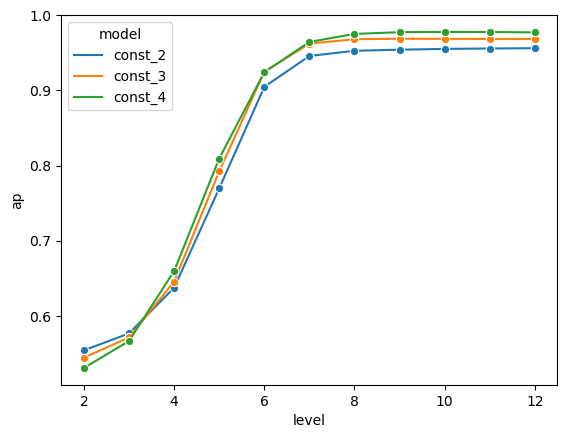

In [85]:
auc_plot = sns.lineplot(x='level', y='ap', data=external_result, hue='model', marker="o")
plt.savefig("Proteasome/in_vitro/const/results/5CV/plots/ap_for_levels.png")
auc_plot